In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df = pd.read_excel('stresslevel.xlsx')
df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']] = df[
    ['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']
].apply(pd.to_numeric, errors='coerce')


#Histogram

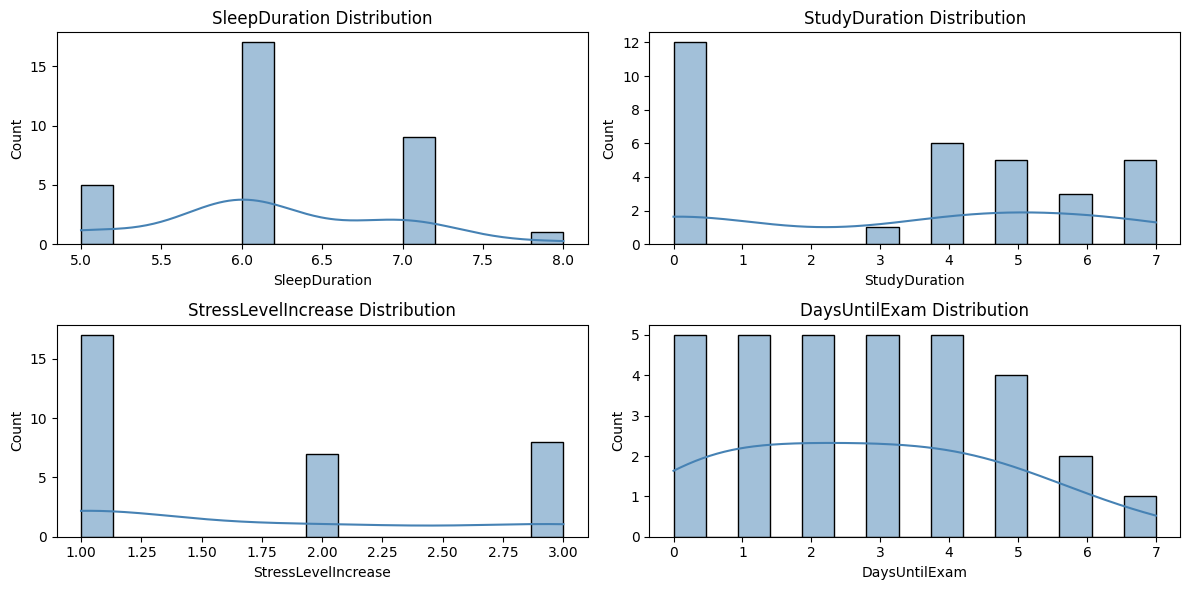

In [2]:

plt.figure(figsize=(12, 6))
for i, column in enumerate(['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], bins=15, kde=True, color='steelblue')
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()


#Boxplot 

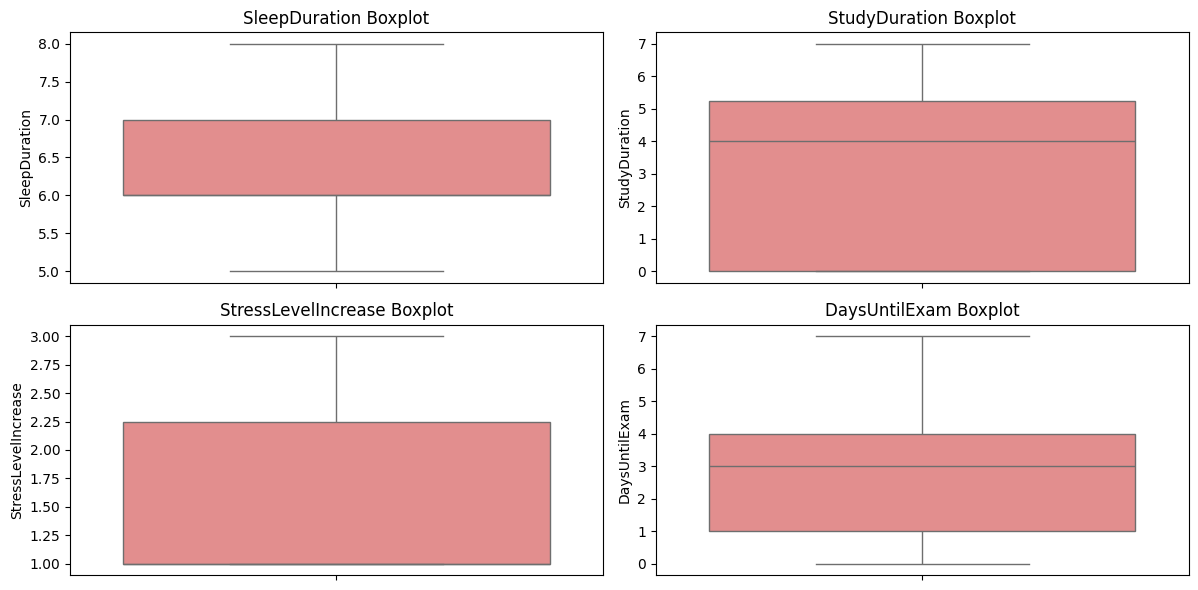

In [3]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[column], color='lightcoral')
    plt.title(f'{column} Boxplot')
plt.tight_layout()
plt.show()

#Scatterplot + Trendline 


<Figure size 1200x600 with 0 Axes>

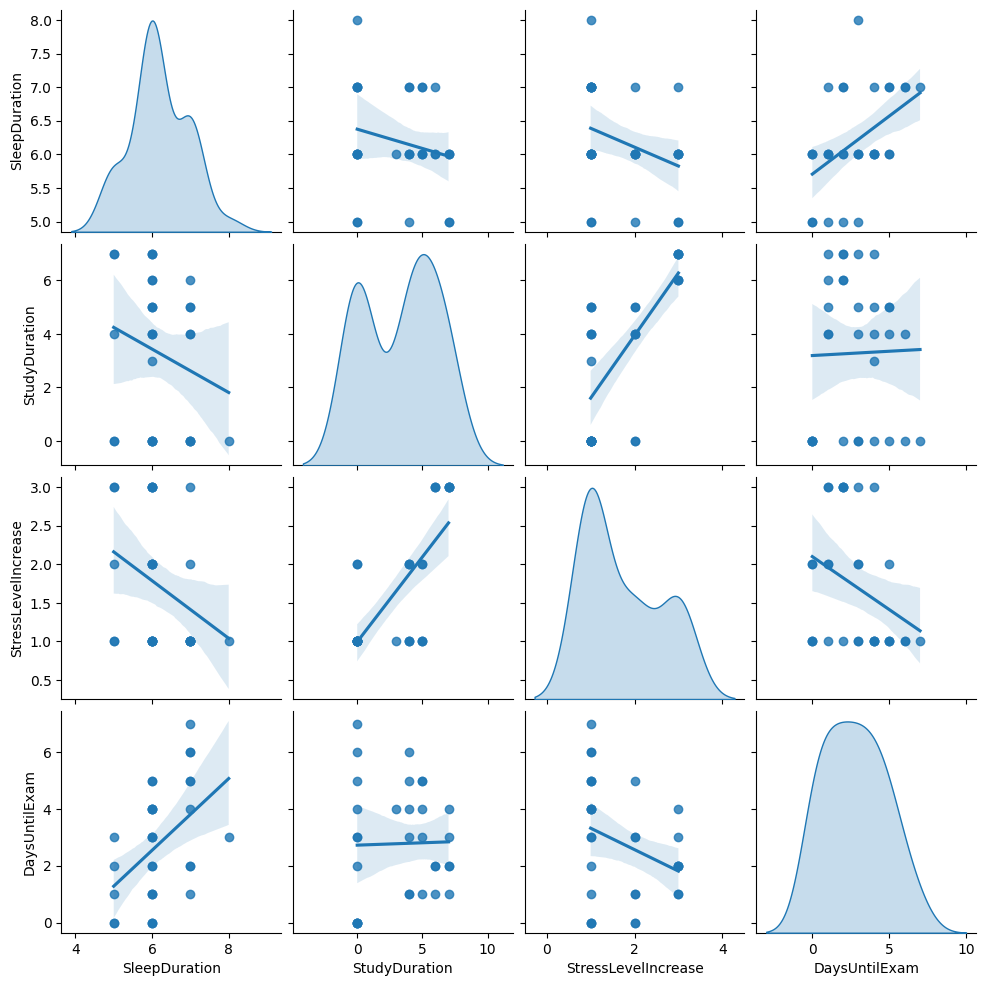

In [4]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']], kind='reg', diag_kind='kde')
plt.show()

#Heatmap

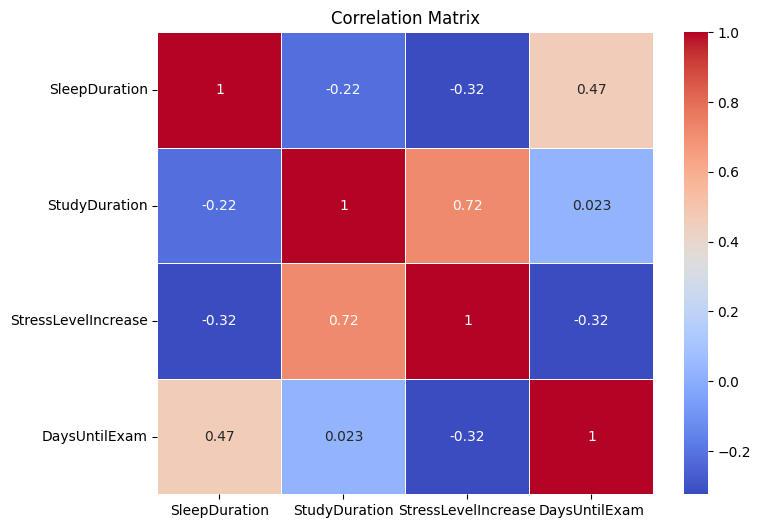

In [5]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Regression Analysis


In [6]:
X = df[['SleepDuration', 'StudyDuration', 'DaysUntilExam']]
X = sm.add_constant(X)  # Sabit terimi ekle
y = df['StressLevelIncrease']

model = sm.OLS(y, X).fit()  # Modeli eğit
print(model.summary())  # Regresyon analizini yazdır

                             OLS Regression Results                            
Dep. Variable:     StressLevelIncrease   R-squared:                       0.630
Model:                             OLS   Adj. R-squared:                  0.590
Method:                  Least Squares   F-statistic:                     15.89
Date:                 Tue, 27 May 2025   Prob (F-statistic):           3.16e-06
Time:                         16:30:16   Log-Likelihood:                -23.842
No. Observations:                   32   AIC:                             55.68
Df Residuals:                       28   BIC:                             61.55
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4777      0.937 

#Scatter Plot (Sleep Duration vs. Stress Level Increase)


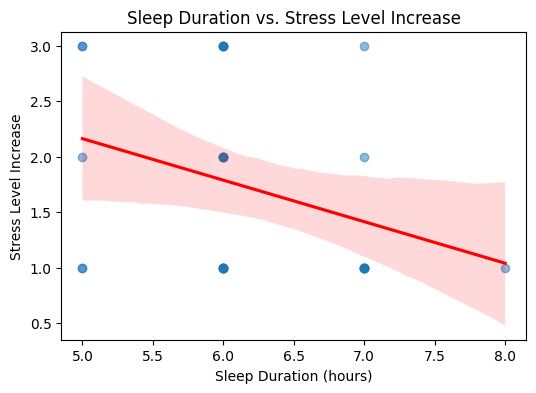

In [7]:
plt.figure(figsize=(6, 4))
sns.regplot(x=df['SleepDuration'], y=df['StressLevelIncrease'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Sleep Duration vs. Stress Level Increase')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()

#Scatter Plot (Study Duration vs. Stress Level Increase)

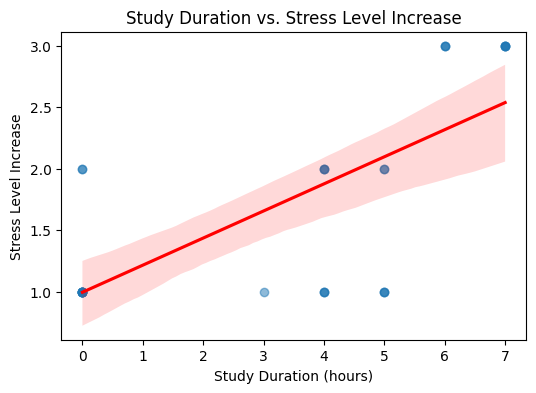

In [8]:
plt.figure(figsize=(6, 4))
sns.regplot(x=df['StudyDuration'], y=df['StressLevelIncrease'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Study Duration vs. Stress Level Increase')
plt.xlabel('Study Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()

#Hypothesis Tests

In [9]:
import pandas as pd
import scipy.stats as stats

# Load dataset
df = pd.read_excel("stresslevel.xlsx")

# Ensure numeric columns are correctly formatted
numeric_columns = ['StudyDuration', 'SleepDuration', 'StressLevelIncrease', 'DaysUntilExam']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical variable IsExamDay to binary
df['IsExamDay'] = df['IsExamDay'].map({'Yes': 1, 'No': 0})

# Drop NaN values
df = df.dropna()

print("=== Hypothesis Testing ===\n")

def format_p(p):
    return "< 0.0001" if p < 0.0001 else f"{p:.6f}"

# 1. Mann-Whitney U Test
exam_days = df[df['IsExamDay'] == 1]['StressLevelIncrease']
non_exam_days = df[df['IsExamDay'] == 0]['StressLevelIncrease']
u_stat, p_u = stats.mannwhitneyu(exam_days, non_exam_days, alternative='two-sided')
print(f"📌 Mann-Whitney U Test (Stress Increase on Exam vs Non-Exam Days):")
print(f"   U = {u_stat:.3f}, p = {format_p(p_u)}")
print("   ✅ Significant" if p_u < 0.05 else "   ❌ Not significant", "\n")

# 2. Kruskal-Wallis Test
df['Route'] = df['Route'].astype(str)
groups = [group['StudyDuration'].dropna() for name, group in df.groupby('Route')]
h_stat, p_kruskal = stats.kruskal(*groups)
print(f"📌 Kruskal-Wallis Test (Study Duration by Route):")
print(f"   H = {h_stat:.3f}, p = {format_p(p_kruskal)}")
print("   ✅ Significant" if p_kruskal < 0.05 else "   ❌ Not significant", "\n")

# 3. Spearman Correlation (Sleep vs Stress)
rho_spearman_sleep, p_spearman_sleep = stats.spearmanr(df['SleepDuration'], df['StressLevelIncrease'])
print("📌 Spearman Correlation (Sleep Duration vs Stress Increase):")
print(f"   r = {rho_spearman_sleep:.3f}, p = {format_p(p_spearman_sleep)}")
print("   ✅ Significant" if p_spearman_sleep < 0.05 else "   ❌ Not significant", "\n")

# 4. Pearson Correlation (Sleep vs Stress)
rho_pearson_sleep, p_pearson_sleep = stats.pearsonr(df['SleepDuration'], df['StressLevelIncrease'])
print("📌 Pearson Correlation (Sleep Duration vs Stress Increase):")
print(f"   r = {rho_pearson_sleep:.3f}, p = {format_p(p_pearson_sleep)}")
print("   ✅ Significant" if p_pearson_sleep < 0.05 else "   ❌ Not significant", "\n")

# 5. Spearman Correlation (Study vs Stress)
rho_spearman_study, p_spearman_study = stats.spearmanr(df['StudyDuration'], df['StressLevelIncrease'])
print("📌 Spearman Correlation (Study Duration vs Stress Increase):")
print(f"   r = {rho_spearman_study:.3f}, p = {format_p(p_spearman_study)}")
print("   ✅ Significant" if p_spearman_study < 0.05 else "   ❌ Not significant", "\n")

# 6. Pearson Correlation (Study vs Stress)
rho_pearson_study, p_pearson_study = stats.pearsonr(df['StudyDuration'], df['StressLevelIncrease'])
print("📌 Pearson Correlation (Study Duration vs Stress Increase):")
print(f"   r = {rho_pearson_study:.3f}, p = {format_p(p_pearson_study)}")
print("   ✅ Significant" if p_pearson_study < 0.05 else "   ❌ Not significant")


=== Hypothesis Testing ===

📌 Mann-Whitney U Test (Stress Increase on Exam vs Non-Exam Days):
   U = 54.000, p = 0.457531
   ❌ Not significant 

📌 Kruskal-Wallis Test (Study Duration by Route):
   H = 29.228, p = < 0.0001
   ✅ Significant 

📌 Spearman Correlation (Sleep Duration vs Stress Increase):
   r = -0.334, p = 0.061724
   ❌ Not significant 

📌 Pearson Correlation (Sleep Duration vs Stress Increase):
   r = -0.324, p = 0.070275
   ❌ Not significant 

📌 Spearman Correlation (Study Duration vs Stress Increase):
   r = 0.737, p = < 0.0001
   ✅ Significant 

📌 Pearson Correlation (Study Duration vs Stress Increase):
   r = 0.718, p = < 0.0001
   ✅ Significant


In [10]:
#StressLevelAfter Prediction via Linear Regression (Without Scikit-learn)

In [11]:
import pandas as pd
import numpy as np

# Veriyi yükle
df = pd.read_excel("stresslevel.xlsx")

# Gerekli sütunlar
features = ["StudyDuration", "SleepDuration", "CaffeineIntake", "DaysUntilExam"]
target = "StressLevelAfter"

# Eksik değerleri kontrol et ve doldur
df = df[features + [target]].copy()
df = df.fillna(df.median(numeric_only=True))

# Özellik ve hedef değişken
X = df[features].values
y = df[target].values.reshape(-1, 1)

# Bias terimi (sabit) için X'e bir sütun daha ekle (hepsi 1)
X_b = np.hstack([np.ones((X.shape[0], 1)), X])  # X_b = [1, x1, x2, x3, x4]

# Normal denklem yöntemi ile katsayıları bul (theta)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Tahminler
y_pred = X_b @ theta_best

# Performans metriği (MSE ve R2)
mse = np.mean((y - y_pred)**2)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

# Sonuçlar
print("Coefficients (theta):")
for i, col in enumerate(['Bias'] + features):
    print(f"{col}: {theta_best[i][0]:.4f}")

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Coefficients (theta):
Bias: 6.6839
StudyDuration: 0.0957
SleepDuration: -0.2882
CaffeineIntake: 1.5457
DaysUntilExam: -0.1346

Mean Squared Error (MSE): 0.4715
R² Score: 0.8758


In [12]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_excel("stresslevel.xlsx")
df.dropna(inplace=True)

# Features and target
feature_columns = ['StudyDuration', 'SleepDuration', 'CaffeineIntake', 'DaysUntilExam']
target_column = 'StressLevelAfter'
X = df[feature_columns]
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models (excluding Linear Regression)
models = {
    'k-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Results as DataFrame
results_df = pd.DataFrame(results).T
print("\n📊 Model Performance Summary:")
print(results_df.round(3))




📊 Model Performance Summary:
                             MAE   RMSE     R²
k-Nearest Neighbors        1.057  1.149  0.680
Support Vector Regression  0.977  1.081  0.717
Random Forest              0.919  0.934  0.788
Neural Network             0.533  0.622  0.906


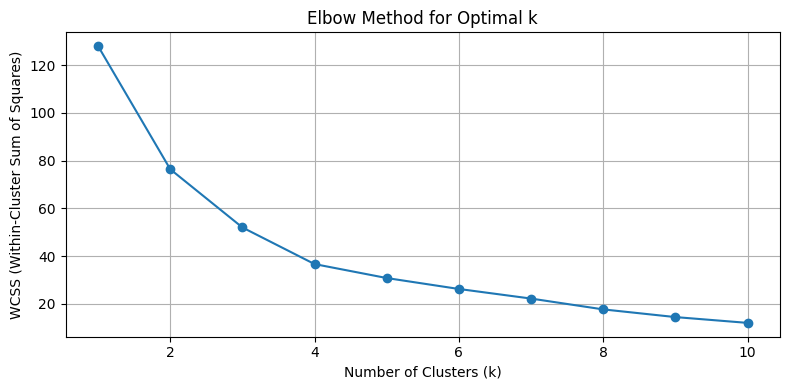

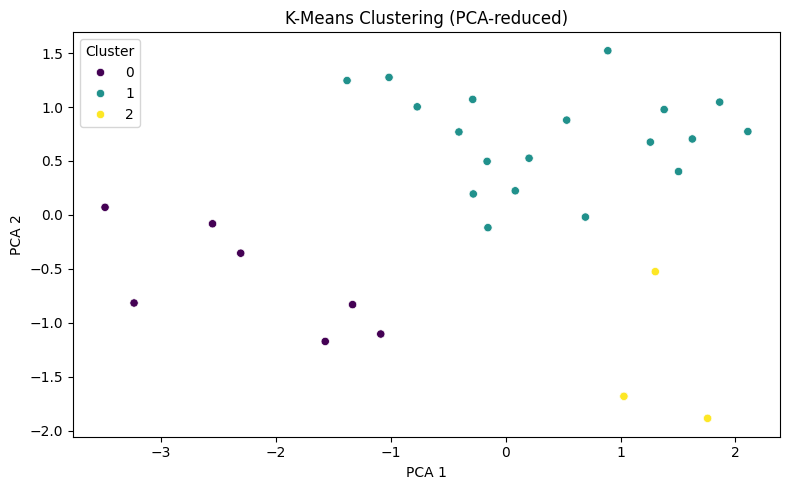

   StudyDuration  SleepDuration  CaffeineIntake  DaysUntilExam  Cluster
0              5              7               2              5        1
1              5              7               2              4        1
2              0              8               0              3        0
3              6              7               3              2        1
4              4              7               2              1        1


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_excel("stresslevel.xlsx")

# Drop missing values
df.dropna(inplace=True)

# Use only the features (no target for unsupervised learning)
feature_columns = ['StudyDuration', 'SleepDuration', 'CaffeineIntake', 'DaysUntilExam']
X = df[feature_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit KMeans with optimal number of clusters (e.g. k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Optional: view clustered data
print(df[['StudyDuration', 'SleepDuration', 'CaffeineIntake', 'DaysUntilExam', 'Cluster']].head())


Random Forest

0.9019428571428565
0.781211881188119


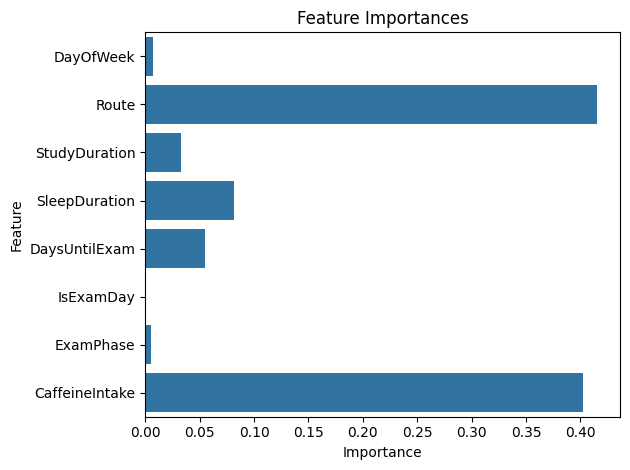

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

df = pd.read_excel("stresslevel.xlsx")
df = df.drop(columns=["Date", "StressLevelIncrease", "StressLevelBefore"])
categorical_cols = ["DayOfWeek", "Route", "ExamPhase", "IsExamDay"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(columns=["StressLevelAfter"])
y = df["StressLevelAfter"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Neural Network

c:\Users\Huaweı\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


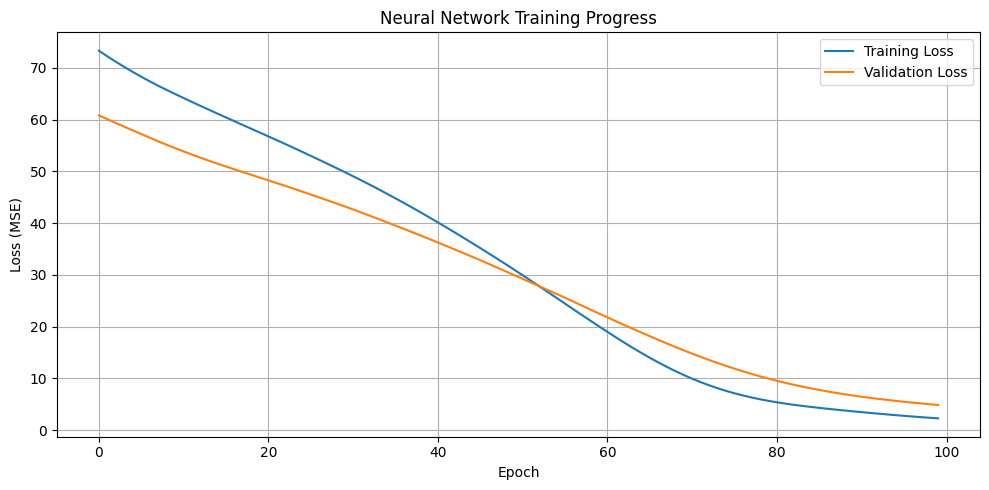

Mean Squared Error: 1.158599853515625
R^2 Score: 0.7189534902572632


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("stresslevel.xlsx")

# Encode categorical variables
categorical_columns = ['DayOfWeek', 'Route', 'ExamPhase', 'IsExamDay']
df[categorical_columns] = df[categorical_columns].apply(LabelEncoder().fit_transform)

# Define features and target
X = df.drop(columns=["Date", "StressLevelAfter"])
y = df["StressLevelAfter"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Neural Network Training Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Support Vector 

R2 Score: 0.680851983508597
MSE: 1.3156714149237432


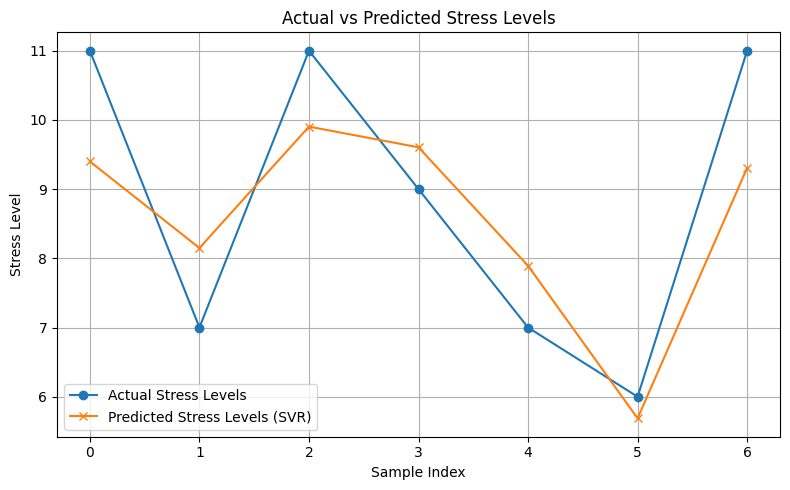

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("stresslevel.xlsx")

# Encode categorical features
df = pd.get_dummies(df, columns=["Route", "DayOfWeek", "ExamPhase"], drop_first=True)
df["IsExamDay"] = df["IsExamDay"].map({"Yes": 1, "No": 0})

# Features and target
X = df.drop(columns=["Date", "StressLevelAfter"])
y = df["StressLevelAfter"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Train SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)

# Predict and inverse scale
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label="Actual Stress Levels", marker='o')
plt.plot(y_pred, label="Predicted Stress Levels (SVR)", marker='x')
plt.title("Actual vs Predicted Stress Levels")
plt.xlabel("Sample Index")
plt.ylabel("Stress Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
